**Nama: Nabilah Sarah Azhar
<br>Batch: 24<br/>**
Statistika

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
import numpy as np

In [3]:
#import from the json file
import os

os.environ['KAGGLE_USERNAME'] = "nabilahsarahazhar" # username from the json file
os.environ['KAGGLE_KEY'] = "d0d89c003f0522bb646f208e0ebd4e02" # key from the json file
!kaggle competitions download -c house-prices-advanced-regression-techniques #download HR Analytics zip dataset dari kaggle
!unzip -q "/content/house-prices-advanced-regression-techniques.zip"  #unzip dataset


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 57.0MB/s]


In [4]:
df = pd.read_csv('train.csv')  #baca dataset

In [6]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Soal 1

Tunjukkan statistika deskriptif untuk variabel harga rumah 
(Column Name : SalePrice)!
Ceritakan kepada tim bisnis apa makna dari nilai nilai 
tersebut!
Ekspektasi output : 
- ukuran pemusatan (4 poin)
- ukuran penyebaran (4 poin)
- Interpretasi (2 poin

In [7]:
#Ukuran Pemusatan
print('Mean :',df['SalePrice'].mean())
print('Median(50%) :',df['SalePrice'].median())
print('Modus :',df['SalePrice'].mode()[0])
print('Q1(25%) :',df['SalePrice'].quantile(0.25))
print('Q3(75%) :',df['SalePrice'].quantile(0.75))

Mean : 180921.19589041095
Median(50%) : 163000.0
Modus : 140000
Q1(25%) : 129975.0
Q3(75%) : 214000.0


In [20]:
#Interpretasi
print ('Rata-rata: Harga 1 rumah berkisar di angka $',round(df['SalePrice'].mean()))
print ('Median: 50% harga rumah berada di bawah $',round(df['SalePrice'].median()))
print ('Q1: 25% harga rumah berada di bawah $',round(df['SalePrice'].quantile(0.25)))
print ('Q3: 25% harga rumah berada di atas $',round(df['SalePrice'].quantile(0.75)))

# - Median: 50% harga rumah berada di bawah $163,000 (bisa berlaku sebaliknya)
# - Modus: Mayoritas harga rumah ada di angka $140,000
# - Q1: 25% harga rumah berada di bawah $129,975
# - Q3: 25% harga rumah berada di atas $214,000

Rata-rata: Harga 1 rumah berkisar di angka $ 180921
Median: 50% harga rumah berada di bawah $ 163000
Q1: 25% harga rumah berada di bawah $ 129975
Q3: 25% harga rumah berada di atas $ 214000


In [21]:
#Ukuran Penyebaran
print('Range:', df['SalePrice'].max() - df['SalePrice'].min())
print('Standard Deviation:',df['SalePrice'].std())
print('Variance:',df['SalePrice'].var())
print('Inter Quartile Range (IQR):',df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25))

Range: 720100
Standard Deviation: 79442.50288288662
Variance: 6311111264.297448
Inter Quartile Range (IQR): 84025.0


# Soal 2

Tunjukkan statistika deskriptif untuk variabel harga rumah 
(Column Name : SalePrice) setiap tahunnya (Column Name : 
YrSold)!
Secara deskriptif jelaskan apakah ada perbedaan setiap 
tahunnya atau tidak?
Ekspektasi output:
- ukuran pemusatan (6 poin)
- ukuran penyebaran (6 poin)
- Interpretasi (3 poin)


In [23]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)


In [30]:
agg = {'SalePrice': ['mean','median',q1,q3,'std']}
df_agg = df.groupby('YrSold').agg(agg).reset_index()
df_agg.columns = ['Tahun','Mean','Median','Q1','Q3','Std']
df_agg.sort_values('Mean',ascending = False)

,Tahun,Mean,Median,Q1,Q3,Std
1,2007,186063.151976,167000.0,129900.0,219500.0,85768.171410
0,2006,182549.458599,163995.0,131375.0,218782.5,79426.838855
3,2009,179432.103550,162000.0,125250.0,212750.0,80879.237311
4,2010,177393.674286,155000.0,128100.0,213250.0,80451.280085
2,2008,177360.838816,164000.0,131250.0,207000.0,69735.610685


In [44]:
#Interpretasi
print("Rata-rata harga rumah paling tinggi ada pada tahun:")
df_agg.sort_values('Mean',ascending = False).head(1)

Rata-rata harga rumah paling tinggi ada pada tahun:


,Tahun,Mean,Median,Q1,Q3,Std
1,2007,186063.151976,167000.0,129900.0,219500.0,85768.17141


# Soal 3

Text(0.5, 1.0, 'Sale Price Distribution Skewed Right (Positively Skewed)')

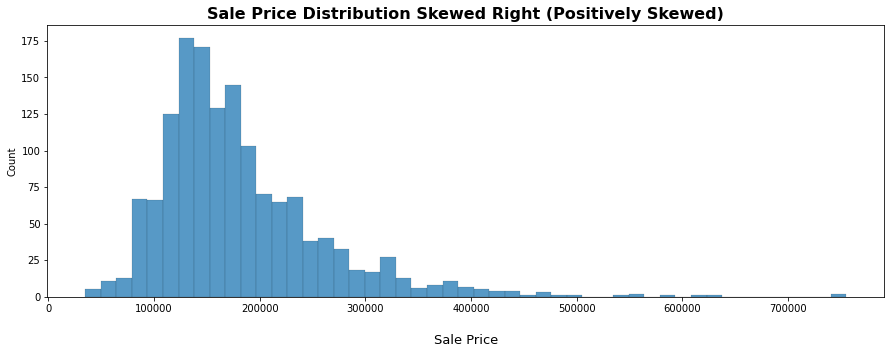

In [46]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df, x='SalePrice', linewidth=0.1)

# set fontsize dan label
plt.xlabel('Sale Price', fontsize = 13, labelpad = 20)
plt.title('Sale Price Distribution Skewed Right (Positively Skewed)',
          fontweight='bold',
          fontsize = 16)

Terlihat dari visualisasi di atas, bahwa plot cenderung skew atau melenceng ke positif. Biasanya jika seperti ini bisa kita lihat di soal nomor 2 sebelumnya bahwa nilai mean > median, oleh karena itu kita akan menggunakan nilai median untuk mengisi null value atau dalam pengambilan data.

# Soal 4

**Penentuan Hipotesis**
<p> H0 : rata-rata harga rumah setiap tahunnya sama <p/>
<p> H1 : rata-rata harga rumah setiap tahunnya berbeda <p/>

**Pengujian yang digunakan**
<p>ANOVA<p/>

In [47]:
df_agg = df.groupby('YrSold').agg({'SalePrice': ['mean']}).reset_index()
df_agg.columns = ['Tahun','Mean']
df_agg

,Tahun,Mean
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


In [48]:
#Hasil Pengujian Hipotesis
df_6 = df[df['YrSold'] == 2006]
df_7 = df[df['YrSold'] == 2007]
df_8 = df[df['YrSold'] == 2008]
df_9 = df[df['YrSold'] == 2009]
df_10 = df[df['YrSold'] == 2010]


f1_test = st.f_oneway(df_6['SalePrice'], df_7['SalePrice'], df_8['SalePrice'], df_9['SalePrice'], df_10['SalePrice'])
f1_test


F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

In [49]:
p_value = f1_test.pvalue
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('Tidak cukup bukti untuk menyatakan bahwa rata-rata harga rumah setiap tahunnya sama')
else:
    print('Cukup bukti untuk menyatakan (Tolak H0) bahwa rata-rata harga rumah setiap tahunnya berbeda')

P-Value : 0.6300887663573457
Tidak cukup bukti untuk menyatakan bahwa rata-rata harga rumah setiap tahunnya sama


<p>Dari hasil pengujian hipotesis, terlihat bahwa P-Value > Alpha.
Artinya dengan adanya uji coba di atas, kita tau bahwa tidak ada perbedaan harga rumah yang signifikan setiap tahunnya.<p/>

**Kesimpulan:**
Harga rumah rata-rata tidak mengalami kenaikan setiap tahunnya.

# Soal Advance

**Load Dataset**

In [51]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [52]:
!unzip -q "/content/gdrive/MyDrive/bank.zip"  #unzip dataset


In [53]:
bank = pd.read_csv('bank-full.csv', engine='python', sep=None)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# AB Testing

**a. Nama Eksperimen**
<br>AB Testing dengan menggunakan Slovin sebagai formula perhitungan sample data, untuk mengetahui pengaruh jumlah campaign pada user yang membuka akun deposit<br/>
**b. Hipotesis**
<br>Semakin banyak jumlah campaign yang dilakukan, maka semakin banyak jumlah user yang membuka akun deposit<br/>
***c. Participant***
<br>Nasabah bank<br/>
**d. Variabel**
<br>jumlah campaign<br/>
**e. Metrics**
* Macroconversions: jumlah campaign setiap nasabah
* Microconversions: jumlah nasabah penerima campaign


Slovin Formula:
https://www.wikihow.com/Calculate-Sample-Size#/Image:Calculate-Sample-Size-Step-12-Version-2.jpg

In [56]:
#Sample Size dan Durasi Experiment
N = bank.shape[0]
e = 0.05
sl_sample = N / (1+ N * e**2)
sl_sample

396.4920742803271

In [59]:
bank_sample = bank.groupby(['y']).apply(lambda x: x.sample(n=200,random_state=123))
bank_sample['y'].value_counts()

no     200
yes    200
Name: y, dtype: int64

Sample size : sample yang dibutuhkan sekitar 400 sample. Dengan masing-masing 200 yes dan 200 no.
Durasi experiment : 7 hari

# Pengujian Hipotesis

**Penentuan Hipotesis**
* H0: rata-rata jumlah campaign nasabah yang membuka akun sama dengan yang tidak membuka akun
* H1: rata-rata jumlah campaign nasabah yang membuka akun berbeda dengan yang tidak membuka akun

**Pengujian yang digunakan**
<br>T-Test<br/>

**Kategori**
<br>membuka dan tidak membuka akun<br/>


In [62]:
#deteksi yes/no
yes = bank[bank['y']=='yes']
no = bank[bank['y']=='no']


In [63]:
yes['campaign'].mean()

2.1410474569861977

In [64]:
no['campaign'].mean()

2.8463503832473322

(0.0, 10.0)

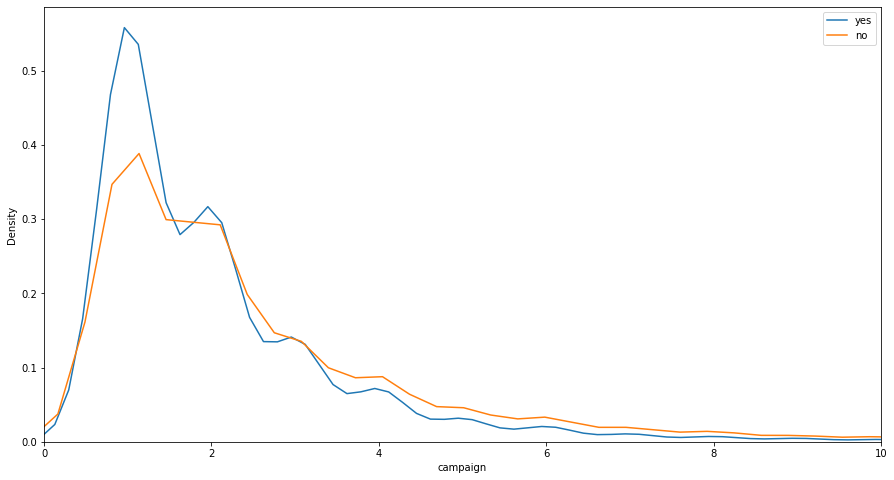

In [68]:
plt.figure(figsize=(15,8))

sns.kdeplot(yes['campaign'],label = 'yes')
sns.kdeplot(no['campaign'], label = 'no')

plt.legend()
plt.xlim(0,10)
(0.0, 10.0)

In [69]:
print('Jumlah data:',bank.shape[0])

Jumlah data: 45211


In [70]:
#Hasil Pengujian Hipotesis
##Metode chi-square
stat, p_value= st.mannwhitneyu(yes['campaign'],no['campaign'])
p_value

1.9484904873905108e-71

In [71]:
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('Tidak cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')
else:
    print('cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')

P-Value : 1.9484904873905108e-71
cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak


**Kesimpulan dan Interpretasi**

Dari hasil pengujian hipotesis, didapatkan bahkan P-Value < Alpha.
Hal ini berarti bahwa terdapat perbedaan yang signifikan pada jumlah campaign pada keputusan user untuk membuka akun / tidak.

Namun, dilihat dari nilai rata-rata yang ada, jumlah campaign berpengaruh pada keputusan user untuk membuka akun / tidak.
Semakin banyak campaign yang diterima user, maka semakin tinggi kemungkinan user untuk tidak membuka akun.

**Kesimpulan**

Jumlah campaign berhubungan terbalik dengan kemungkinan user untuk membuka akun.